<a href="https://colab.research.google.com/github/sangaer/PracticalMachineLearning2019/blob/master/Copy_of_%5BLecture1_2%5DLogisticRegression_and_PracticalBasics_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 1-2: Logistic Regression (for classification)

.### impliment here: ###


## 0. Kaggle Glace https://www.kaggle.com
## 1. Apply Your Kaggle Account 
## 2. Get the API key(kaggle.json) and upload

.### impliment here: ###


### Place your Kaggle API key properly

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

### download dataset by API

In [0]:
### impliment your code here: ###

# https://www.kaggle.com/tongpython/cat-and-dog
!kaggle datasets download -d tongpython/cat-and-dog
### impliment your code here: ###

100% 218M/218M [00:01<00:00, 165MB/s]



### decompress the dataset -> jpgs

In [0]:
!unzip cat-and-dog.zip

Archive:  cat-and-dog.zip
  inflating: test_set/test_set/cats/_DS_Store  
  inflating: test_set/test_set/cats/cat.4001.jpg  
  inflating: test_set/test_set/cats/cat.4002.jpg  
  inflating: test_set/test_set/cats/cat.4003.jpg  
  inflating: test_set/test_set/cats/cat.4004.jpg  
  inflating: test_set/test_set/cats/cat.4005.jpg  
  inflating: test_set/test_set/cats/cat.4006.jpg  
  inflating: test_set/test_set/cats/cat.4007.jpg  
  inflating: test_set/test_set/cats/cat.4008.jpg  
  inflating: test_set/test_set/cats/cat.4009.jpg  
  inflating: test_set/test_set/cats/cat.4010.jpg  
  inflating: test_set/test_set/cats/cat.4011.jpg  
  inflating: test_set/test_set/cats/cat.4012.jpg  
  inflating: test_set/test_set/cats/cat.4013.jpg  
  inflating: test_set/test_set/cats/cat.4014.jpg  
  inflating: test_set/test_set/cats/cat.4015.jpg  
  inflating: test_set/test_set/cats/cat.4016.jpg  
  inflating: test_set/test_set/cats/cat.4017.jpg  
  inflating: test_set/test_set/cats/cat.4018.jpg  
  inflat

### Libraies

In [0]:
import os
from collections import Counter

import sklearn
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

### parse images into DataFrame

In [0]:
def dataset_parse(folders, size=(32, 32)):
    
    if isinstance(folders, str):
        folders = [folders, ]

    features = list()
    labels = list()

    for folder in folders:
        for root, dirs, files in os.walk(folder):
            for f in filter(lambda x: x.endswith('.jpg'), files):
                img = cv2.resize(cv2.imread(os.path.join(root, f)), size)
                label = os.path.basename(root)
                
                labels.append(label)
                features.append(img)

    df = pd.DataFrame({'img':features, 'category': labels})
    df = df.sample(n=len(df), random_state=0) # shuffle
    df.reset_index(drop=True, inplace=True)
    return df

In [0]:
data_test ='test_set/test_set/'
data_train ='training_set/training_set/'

# In this Task, we merge original train & test set and split by requirement(you can deside depends on the task)

In [0]:
df = dataset_parse([data_train, data_test], size=(32,32))

# Glace of the data

In [0]:
df.head(5)

,img,category
0,"[[[7, 7, 7], [7, 8, 9], [51, 61, 50], [7, 8, 1...",cats
1,"[[[108, 122, 142], [111, 124, 141], [65, 71, 8...",cats
2,"[[[230, 229, 224], [230, 230, 224], [230, 230,...",cats
3,"[[[167, 175, 174], [170, 178, 177], [166, 174,...",dogs
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",cats


In [0]:
Counter(df['category'])

Counter({'cats': 5011, 'dogs': 5017})

In [0]:
index = 0
df['img'][index]

array([[[  7,   7,   7],
        [  7,   8,   9],
        [ 51,  61,  50],
        ...,
        [ 87,  71,  64],
        [ 60,  73,  82],
        [180, 173, 153]],

       [[  6,   6,   6],
        [  5,   5,   7],
        [ 87,  93,  82],
        ...,
        [ 74,  76,  77],
        [ 76,  86,  92],
        [171, 166, 151]],

       [[  7,   7,   7],
        [  7,   7,   8],
        [116, 121, 109],
        ...,
        [ 98, 102, 103],
        [102, 105, 111],
        [146, 148, 132]],

       ...,

       [[ 15,  17,  18],
        [ 30,  32,  32],
        [ 15,  17,  17],
        ...,
        [ 30,  31,  27],
        [ 11,  15,  15],
        [ 57,  55,  50]],

       [[ 13,  17,  18],
        [ 48,  49,  49],
        [ 18,  18,  18],
        ...,
        [ 33,  31,  29],
        [ 15,  20,  20],
        [ 64,  61,  56]],

       [[ 16,  20,  21],
        [ 37,  38,  38],
        [ 14,  13,  13],
        ...,
        [ 26,  24,  23],
        [ 18,  22,  22],
        [ 58,  55,  50]]

This is an image of "cats" as size: (32, 32, 3)


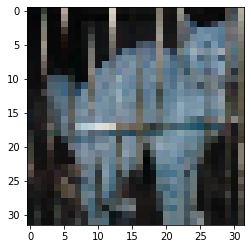

In [0]:
index = 0
print('This is an image of "{}" as size: {}'.format(df['category'][index], df['img'][index].shape))
plt.imshow(df['img'][index])
plt.show()

In [0]:
print('max value if the dataset: {}'.format(np.max(np.concatenate(df['img'].values))))
print('min value if the dataset: {}'.format(np.min(np.concatenate(df['img'].values))))

max value if the dataset: 255
min value if the dataset: 0


### We don't know how to process array yet. So we convert array into vactor with definded order.

In [0]:
df['feature'] = df['img'].apply(lambda x: x.reshape([1, -1]))

In [0]:
df['feature'][0].shape

(1, 3072)

### Normalize the feature (you can try what is the difference)

In [0]:
### impliment your code here: ###

def normalize(x):
    return x/256 - 0.5

df['feature'] = df['feature'].apply(lambda x: x/256 - 0.5) # converge to [-0.5, 0.5)
# df['feature'] = df['feature'].apply(normalize)
# df['feature'] = df['feature'].apply(lambda x: x/256) # converge to [0, 1)

### impliment your code here: ###

### We don't know how to predict "text", so convert cats->1, dogs->0

In [0]:
df['label'] = df['category'].apply(lambda x: 1 if x=='cats' else 0)

### train/test split with 80/20%

In [0]:
train_rate = 0.8
df_train = df[:int(train_rate * len(df))]
df_test = df[int(train_rate * len(df)):]

### split feature and label

In [0]:
x_train = np.concatenate(df_train['feature'].values, axis=0)
y_train = df_train['label'].values

x_test = np.concatenate(df_test['feature'].values, axis=0)
y_test = df_test['label'].values

# Logistic Regression

![alt text](https://drive.google.com/uc?id=1-LYvA_aT5UpjTAzzIW128XHMcDz0RKCZ)
reference: Jessee Kung 2019/4/10 (https://sites.google.com/view/tu-ad1062-mlfundamentals/)

# f: activation function
# we set f(z) = sigmoid(z) for Linear Regression (https://en.wikipedia.org/wiki/Sigmoid_function)

![alt text](https://drive.google.com/uc?id=1CO5oExjpjal7Mqf2oGrozedmwXBw6Pkk)

![alt text](https://drive.google.com/uc?id=1pAav0St8ajL7vx0iO1cUb6amV_aD_2Qc)

In [0]:
class GDLogisticRegression:

    def __init__(self, lr=0.03, it=1000):
        self.w = None
        self.b = None
        self.lr = lr
        self.iteration = it

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def fit(self, x, y, verbose=100):
        y = np.array(y)
        losses = list()
        
        print(x.shape)
        m, n = x.shape
        self.w = np.zeros([n])
        self.b = 0

        for i in range(self.iteration):
            _y = self.predict(x)
            
            loss = (- 1 / m) * np.sum(y*np.log(_y) + (1-y)*np.log(1-_y))
            losses.append(loss)

            if verbose and not (i%verbose):
                print('iteration: {}, training loss: {:.6f}'.format(i, loss))

            dw = (1 / m) * np.dot(x.T, (_y - y))
            db = np.mean(_y - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db
        # return losses

    def predict(self, x, ):
        assert self.w is not None
        assert self.b is not None
        x = np.array(x)
        if len(x.shape)==1:
            x = np.concatenate(x, axis=0)
        return self.sigmoid(np.dot(self.w, x.T) + self.b)


## trainning

In [0]:
clf = GDLogisticRegression(lr=0.03)

In [0]:
clf.fit(x_train, y_train)

(8022, 3072)
iteration: 0, training loss: 0.693147
iteration: 100, training loss: 0.662776
iteration: 200, training loss: 0.654136
iteration: 300, training loss: 0.648213
iteration: 400, training loss: 0.643389
iteration: 500, training loss: 0.639198
iteration: 600, training loss: 0.635454
iteration: 700, training loss: 0.632058
iteration: 800, training loss: 0.628949
iteration: 900, training loss: 0.626084


In [0]:
def binarize_predict(_y_pred, thresh=0.5):
    return (_y_pred > thresh).astype(int)

In [0]:
from sklearn.metrics import accuracy_score

y_pred_train = binarize_predict(clf.predict(x_train))
accuracy_train = accuracy_score(y_pred_train, y_train)

y_pred_test = binarize_predict(clf.predict(x_test))
accuracy_test = accuracy_score(y_pred_test, y_test)

print(clf)
print('training accuracy: {:4f}, testing accuracy: {:4f}'.format(accuracy_train, accuracy_test))

training accuracy: 0.660808, testing accuracy: 0.601695


### training a sklearn model

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
clf = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                    early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
                    l1_ratio=0.15, learning_rate='constant', loss='log',
                    max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
                    power_t=0.5, random_state=None, shuffle=True, tol=0.001,
                    validation_fraction=0.1, verbose=0, warm_start=False)
clf.fit(x_train, y_train)
accuracy_train = accuracy_score(binarize_predict(clf.predict(x_train)), y_train)
accuracy_test = accuracy_score(binarize_predict(clf.predict(x_test)), y_test)

print('training accuracy: {:4f}, testing accuracy: {:4f}'.format(accuracy_train, accuracy_test))

training accuracy: 0.653952, testing accuracy: 0.534397


# developement(validation) set

### split the developement set from training set

In [0]:
dev_rate = 0.1

### impliment your code here: ###

_x_dev = x_train[:int(dev_rate * len(x_train))]
_y_dev = y_train[:int(dev_rate * len(x_train))]

_x_train = x_train[int(dev_rate * len(x_train)):]
_y_train = y_train[int(dev_rate * len(x_train)):]

### impliment your code here: ###

train on _train and select the best parameter/model by _dev

In [0]:
best_score = 0
best_clf = None 

### impliment your code here: ###
for clf in [SGDClassifier(loss='log', learning_rate='constant', eta0=0.1), 
            SGDClassifier(loss='log', learning_rate='constant', eta0=0.03), 
            SGDClassifier(loss='log', learning_rate='constant', eta0=0.01),
            SGDClassifier(loss='log', learning_rate='constant', eta0=0.003),
            SGDClassifier(loss='log', learning_rate='constant', eta0=0.001),
            SGDClassifier(loss='log', learning_rate='constant', eta0=0.0003),
            SGDClassifier(loss='log', learning_rate='constant', eta0=0.0001)]:

    clf.fit(_x_train, _y_train)
    score = accuracy_score(binarize_predict(clf.predict(_x_dev)), _y_dev)

    print('val score: {}, \nmodel: {}\n'.format(score, clf))

    if score > best_score:
        best_clf = clf
        best_score = score

### impliment your code here: ###
print('\n\n\n')
print('WE TAKE THE BEST MODEL as \n val score: {}, \nmodel: {}'.format(best_score, best_clf))
        

val score: 0.5473815461346634, 
model: SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

val score: 0.5785536159600998, 
model: SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.03, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

val score: 0.527431421446384, 
model: SGDClassifier(alpha=0.0001, average

In [0]:
accuracy_test = accuracy_score(binarize_predict(best_clf.predict(x_test)), y_test)
print('testing score: {}'.format(accuracy_test))

testing score: 0.5922233300099701


# You should also know:

*   recall
*   precision
*   f1 score
*   false positive rate(FPR)
*   ROC / AUC
*   cross validation
*   overfitting/ underfitting
*   other sklearn classification models




